<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2022_2023/Practiques/Practica4_Integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4: Integración MonteCarlo**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr4_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr4_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>

**Objectivo de la práctica** 

En el reciente examen vimos esta distribución (donde hemos fijado $\theta=0.5$):

$$
f(x) = 0.5(1+\frac{x}{2}) \text{, con -1<x<1}
$$

En esta práctica vamos a integrar $f(x)$ de forma numérica usando el método de integración *Riemann* e integración *MonteCarlo* (con el método de aceptación/rechazo). Como es una densidad de probabilidad, la integral en ambos casos nos tiene que dar un valor de 1.

### <font color='orange'>**> Python #1**</font>

Vamos a escribir una parte de código que defina f(x), y dibujemos la función en el rango [-1,1], evaluando la función en 1000 puntos distribuidos de forma uniforme ($np.linspace$) en dicho rango. 


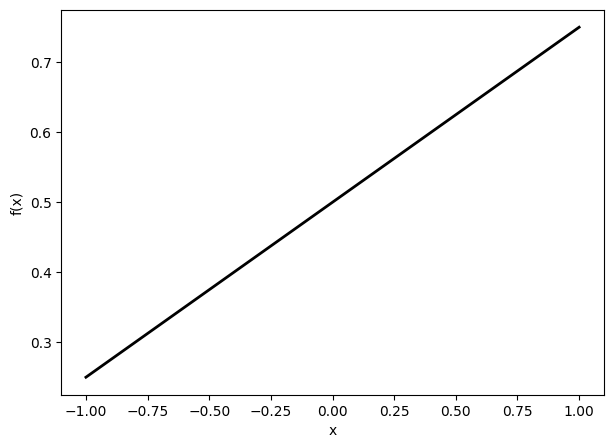

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 0.5*(1+0.5*x)

Np = 1000
x = np.linspace(-1,1,Np)

plt.figure(figsize=(7, 5))
plt.plot(x,f(x),'k-',lw=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## **Fundamentos de la cuadratura**

Queremos obtener la integral $I$ de una función $f(x)$ a partir de una aproximación $I_N$ tal que 

$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$

donde los $x_i$ son los *puntos de cuadratura* o *nodos* y los "$w_i$" son los *pesos*. Normalmente una determinada regla de cuadratura especifica los puntos $x_i$ y el conjunto de pesos $w_i$.

La convergencia requiere:

$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

Cogemos una función $f(x)$ y una partición del intervalo $[a,b]$ en $\{x_i\}^N_{i=0}$, donde $a = x_0 < x_1 < \ldots < x_N = b$. Consideramos los puntos $x^*_i$ como $x^*_i \in [x_i, x_{i+1}]$. 

Definimos los sumatorios de *Riemann* como:

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

Esta es una definición general del método, que tiene diferentes técnicas de cuadratura basadas en como escogemos $x_i^* \in [x_i, x_{i+1}]$. En la regla del punto medio escogemos $x_i^*$ tal que:

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

de manera que

$$I = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N$$

sobre cada intervalo $\Delta x_i = x_{i+1} - x_i$ 


### <font color='orange'>**> Python #2**</font>

Vamos a escribir una parte de código que integre la función $f(x)$ que hemos definido antes, en el rango [-1,1], usando el método de Riemann, con la regla del punto medio. Usa 10 intervalos en el rango para evaluar la integral $I_{10}$. 

Sabemos que la integral tiene que ser 1. Compara el resultado obtenido con este valor analítico.

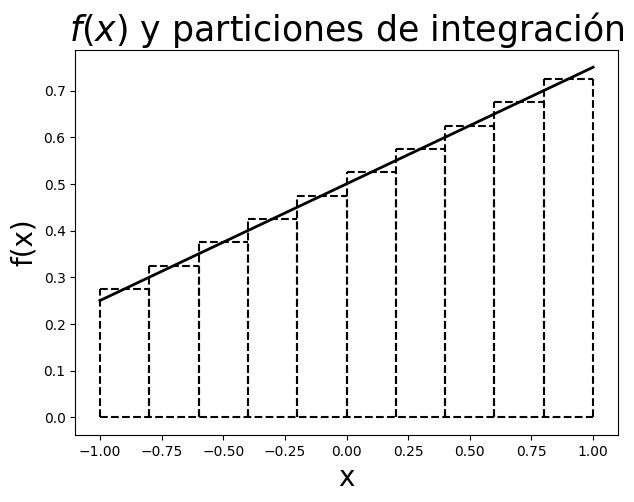

Numerical integration : 0.9999999999999998
Analytical integration : 1
Error : 0.000000000000022%


In [ ]:
num_partitions = 10
x_hat = np.linspace(-1.0, 1.0, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]
#x_start = x_hat[:-1]+delta_x/2. # Otra parte de código más fácil de entender

plt.figure(figsize=(7, 5))
plt.plot(x, np.zeros(x.shape), 'k--') # Plota la parte de abajo con rayas
plt.plot(x, f(x), 'k-',lw=2)

for i in range(num_partitions):
    plt.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    plt.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    plt.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.title("$f(x)$ y particiones de integración", fontsize=25)
plt.show()

I_hat = np.zeros(x_star.shape) # También se puede crear un array vacío I_hat = [], y usar la función append
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x

print("Numerical integration : {}".format(I_hat[-1]))
print("Analytical integration : 1")
print("Error : {:3.15f}%".format(100.*abs(I_hat[-1]-1)/1))

## **Integración MonteCarlo**

Usaremos el método Monte Carlo para calcular la integral de $f(x)$: si lanzamos aleatoriamente puntos (x, y) en la gráfica de la función que queremos integrar, el número de puntos que caen bajo la curva $𝑁_𝑉$ es proporcional al área $𝐼$. Por lo tanto, si generamos $𝑁_𝑇$ puntos sobre un área $𝐴_𝑇$ que contiene $𝐼$, obtenemos la siguiente relación:

$$
I = A_T \frac{N_V}{N_T}
$$


### <font color='green'>**> ENTREGA**</font>

Vamos a calcular la integral de $f(x)$ usando este método de aceptación/rechazo, usando 1000 puntos aleatorios lanzados en una área $A_T$. Evalua la integral y haz una gráfica de $f(x)$ y dibuja en verde aquellas parejas de puntos aleatorios $(x,y)$ que quedan por debajo de $f(x)$, y en rojo los que quedan por encima. 

*Notas:*

Para generar N números aleatorios distribuidos de forma uniforme entre $a$ y $b$ se tiene que usar esta función de Numpy:

```
numpy.random.uniform(a,b,N)
```

Para encontrar el área $A_T$, y por tanto los límites de esa área, necesitamos saber cuál es el rango de valores óptimo que toma la función $f(x)$. Así pues tenemos que encontrar el máximo de la función en el eje $y$. Se pueden usar esta función de Numpy:

```
numpy.amax(f(x))
```

Una vez tienes el rectángulo de área $A_T$, generamos N puntos $(x,y)$ distribuidos de forma uniforme en ese intervalo. 

Una vez generados esos puntos, contamos cuantas parejas de puntos caen por debajo de la curva $f(x)$ y evaluamos la integral mediante la expresión anterior.

### <font color='green'>**> ENTREGA: Parte 1**</font>

Vamos primero a dibujar la función que queremos integrar y define el área donde generaremos los puntos aleatorios. Recuerda que puedes fijar los límites en el eje y con $plt.ylim$: **[3 punts]**

### <font color='green'>**> ENTREGA: Parte 2**</font>

Genera 100 puntos aleatorios en el área $A_T$ para calcular la integral de $f(x)$, y compara el número con el valor de la integral analítica: **[4 punts]**

### <font color='green'>**> ENTREGA: Parte 3**</font>

Vemos que si generamos pocos números aleatorios, la precisión de la integral es bastante mala. Si aumentamos el número N de números aleatorios, la integral converge al valor de la integral analítica.

Aumentemos N de 100 a 100000 (en pasos de 100 en 100) y hagamos una gráfica de la precisión $P$ en % en función de N, donde $P$ es (usa la función de Numpy *abs* que calcula el valor absoluto de un número *np.abs(P)*): **[3 punts]**

$$
P(\%) = 100 \cdot |\frac{I_N-I_{analítica}}{I_{analítica}}|
$$

<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr4_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr4_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>